In [1]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

calendar = pd.read_csv('data/calendar.csv')
listings = pd.read_csv('./data/listings.csv')
reviews = pd.read_csv('./data/reviews.csv')

## Understanding data

In [2]:
calendar.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

In [3]:
calendar['available'].value_counts()

f    665853
t    643037
Name: available, dtype: int64

price is Null for some entries

In [4]:
print("percent of nan price:", calendar[calendar['price'].isnull()]['price'].shape[0]/calendar.shape[0])

percent of nan price: 0.5087157820748879


In [5]:
print("percent of nan price for available listings", calendar[calendar['available']=='t'][calendar['price'].isnull()]['price'].shape[0]/calendar.shape[0])

percent of nan price for available listings 0.0


C:\Users\santo\Miniconda3\envs\conda-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [6]:
print("percent of nan price for unavailable listings", calendar[calendar['available']=='f'][calendar['price'].isnull()]['price'].shape[0]/calendar.shape[0])

percent of nan price for unavailable listings 0.5087157820748879


C:\Users\santo\Miniconda3\envs\conda-env\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [7]:
calendar.shape

(1308890, 4)

In [8]:
print(f"listing is available from {calendar.date.min()} to {calendar.date.max()}")

listing is available from 2016-09-06 to 2017-09-05


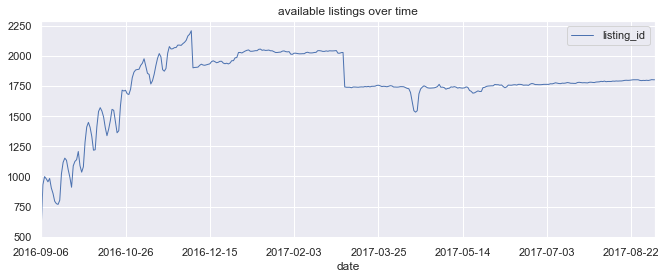

In [9]:
calendar[calendar['available']=='t'].groupby('date').agg({'listing_id':'count'}).plot(linewidth=1, title='available listings over time');

Calendar contains 4 columns and 1308890 listings
columns include 
* listing_id : id linked to the property/listing
* date : the date 
* available : takes value 'f' or 't' denoting false or true respectively.
* price : 643037 not null entries, price is available for all available listings and 50.87% available for unavailable listings

In [10]:
listings['price'] = listings['price'].str[1:].str.split(',').str.join('').astype(float) 

In [11]:
import json
import folium

m = folium.Map(location=[42.33, -71.07], zoom_start=11.5)

with open('data\Boston_Neighborhoods.geojson') as boston_json:
    b_json = json.load(boston_json)

folium.Choropleth(geo_data=b_json, 
                  name='choropleth', 
                  data=listings.groupby('neighbourhood').agg({'name':'count'}).reset_index(), 
                  columns=['neighbourhood','name'],
                  fill_color='YlOrRd',
                  key_on ='properties.Name',
                  fill_opacity=0.6,
                  line_opacity=0.2
                 ).add_to(m)
m

In [12]:
m = folium.Map(location=[42.33, -71.07], zoom_start=11.5)

folium.Choropleth(geo_data=b_json, 
                  name='choropleth', 
                  data=listings.groupby('neighbourhood').agg({'price':'mean'}).reset_index(), 
                  columns=['neighbourhood','price'],
                  fill_color='YlOrRd',
                  key_on ='properties.Name',
                  fill_opacity=0.6,
                  line_opacity=0.2
                 ).add_to(m)
m

In [13]:
m = folium.Map(location=[42.33, -71.07], zoom_start=11.5)

folium.Choropleth(geo_data=b_json, 
                  name='choropleth', 
                  data=listings.groupby('neighbourhood').agg({'reviews_per_month':'sum'}).reset_index(), 
                  columns=['neighbourhood','reviews_per_month'],
                  fill_color='YlOrRd',
                  key_on ='properties.Name',
                  fill_opacity=0.6,
                  line_opacity=0.2
                 ).add_to(m)
m

In [14]:
m = folium.Map(location=[42.33, -71.07], zoom_start=11.5)

folium.Choropleth(geo_data=b_json, 
                  name='choropleth', 
                  data=listings.groupby('neighbourhood').agg({'review_scores_rating':'mean'}).reset_index(), 
                  columns=['neighbourhood','review_scores_rating'],
                  fill_color='YlOrRd',
                  key_on ='properties.Name',
                  fill_opacity=0.6,
                  line_opacity=0.2
                 ).add_to(m)
m

south has more ratings score, less review per month, less prices
why more rating score but less price?

In [15]:
listings[['review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]

review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0                      NaN                     NaN                        NaN   
1                     94.0                    10.0                        9.0   
2                     98.0                    10.0                        9.0   
3                    100.0                    10.0                       10.0   
4                     99.0                    10.0                       10.0   
...                    ...                     ...                        ...   
3580                  90.0                    10.0                       10.0   
3581                   NaN                     NaN                        NaN   
3582                   NaN                     NaN                        NaN   
3583                  90.0                     9.0                        8.0   
3584                   NaN                     NaN                        NaN   

      review_scores_checkin  review_scores_communication  \
0                       NaN                          NaN   
1                      10.0                         10.0   
2                      10.0                         10.0   
3                      10.0                         10.0   
4                      10.0                         10.0   
...                     ...                          ...   
3580                   10.0                         10.0   
3581                    NaN                          NaN   
3582                    NaN                          NaN   
3583                    9.0                          9.0   
3584                    NaN                          NaN   

      review_scores_location  review_scores_value  
0                        NaN                  NaN  
1                        9.0                  9.0  
2                        9.0                 10.0  
3                       10.0                 10.0  
4                        9.0                 10.0  
...                      ...                  ...  
3580                     8.0                  9.0  
3581                     NaN                  NaN  
3582                     NaN                  NaN  
3583                     8.0                  7.0  
3584                     NaN                  NaN  

[3585 rows x 7 columns]

In [16]:
reviews

listing_id        id        date  reviewer_id reviewer_name  \
0         1178162   4724140  2013-05-21      4298113       Olivier   
1         1178162   4869189  2013-05-29      6452964     Charlotte   
2         1178162   5003196  2013-06-06      6449554     Sebastian   
3         1178162   5150351  2013-06-15      2215611        Marine   
4         1178162   5171140  2013-06-16      6848427        Andrew   
...           ...       ...         ...          ...           ...   
68270     7462268  80537457  2016-06-18     22034145       Antonio   
68271     7462268  83640094  2016-07-03     40052513         Steve   
68272     7462268  85797088  2016-07-13     77129134          Nick   
68273     7462268  97264637  2016-08-26     15799803           Vid   
68274     7462268  98550693  2016-08-31     90128094       Arianna   

                                                comments  
0      My stay at islam's place was really cool! Good...  
1      Great location for both airport and city - gre...  
2      We really enjoyed our stay at Islams house. Fr...  
3      The room was nice and clean and so were the co...  
4      Great location. Just 5 mins walk from the Airp...  
...                                                  ...  
68270  Joe y su mujer son encantadores. La habitación...  
68271  Joe was on his way to Jamaica to be married! o...  
68272  The room was very clean as were the bathrooms ...  
68273  Staying in Lower Allston at Joe and Nancy's pl...  
68274  The room itself and the aprtment were very cle...  

[68275 rows x 6 columns]